# Molecular Quantum Mechanics (CB2070)
## SOLUTION Computer lab 1: Orbitals and one-particle densities
---
Name: J.H. Andersen with stolen content from VT24 and VT25 student submissions

Date: July 2025

---

In [1]:
import veloxchem as vlx

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simpson as simps

In [2]:
mol_str = """
    Ne     0.000000    0.000000    0.000000
"""
molecule = vlx.Molecule.read_str(mol_str, units='angstrom')

### 1. Basis set quality

In [3]:
# closed-shell HF wave function
scf_drv = vlx.ScfRestrictedDriver()

In [4]:
# a list with the basis sets
basis_sets = ['sto-3g','6-31g','6-31+g','6-311g','aug-cc-pvdz','cc-pvdz']

hf_energies = {}
for basis_set in basis_sets:
    
    basis = vlx.MolecularBasis.read(molecule, basis_set)
    scf_results = scf_drv.compute(molecule, basis)
    
    hf_energies[basis_set] = scf_drv.get_scf_energy()

                                                                                                                          
                                            Self Consistent Field Driver Setup                                            
                                                                                                                          
                   Wave Function Model             : Spin-Restricted Hartree-Fock                                         
                   Initial Guess Model             : Superposition of Atomic Densities                                    
                   Convergence Accelerator         : Two Level Direct Inversion of Iterative Subspace                     
                   Max. Number of Iterations       : 50                                                                   
                   Max. Number of Error Vectors    : 10                                                                   
                

In [5]:
# print the basis sets and the energies
for basis_set in basis_sets:
    print(f"Basis set: {basis_set:12s} HF energy: {hf_energies[basis_set]:16.12} Hartree")

Basis set: sto-3g       HF energy:   -126.604525089 Hartree
Basis set: 6-31g        HF energy:   -128.473876871 Hartree
Basis set: 6-31+g       HF energy:   -128.483549729 Hartree
Basis set: 6-311g       HF energy:   -128.522553054 Hartree
Basis set: aug-cc-pvdz  HF energy:   -128.496349731 Hartree
Basis set: cc-pvdz      HF energy:   -128.488775552 Hartree


1. Discuss the assessment of the basis set quality

The larger and more flexible the basis set is, the better the quality of the wavefunction and, thus, the lower the energy.
Since the the minimization is based on the variational principle the approximated energy will always be greater than or equal to the actual ground state energy. Therefore the lower the approximated energy is the better. So in order from best to worst: 6-311g, aug-cc-pvdz, cc-pvdz, 6-31+g, 6-31g, sto-3g.

The smallest basis set is sto-3g, and this gives the worst results, i.e. the highest energy (E < E_g). Adding one more (6-31G) and two more (6-311G) basis functions per occupied valence orbital improves the results (yeilds lower energies). 6-31+g adds a diffuse function to 6-31g, this improves the result somewhat, but not as much as going to 6-311g. cc-pVDZ is double-zeta like 6-31G, but it has an added polarization function,  which impoove the results compared to 6-31G. aug-cc-pVDZ adds a diffuse term to cc-pVDZ, and thus has both polarization and diffuse functions. This results in even lower energy than cc-pVDZ. Triple-zeta (6-311G) still yeilds the lowest energy out of all basis sets, probably since we have an isolated ground state atom and polarization and diffuse functions are mostly important for bonding and excited state calculations.

### 2. Orbital values

In [6]:
# Continue with the cc-pVDZ basis set
basis = vlx.MolecularBasis.read(molecule, 'cc-pvdz')
scf_results = scf_drv.compute(molecule, basis)

                                                                                                                          
                                            Self Consistent Field Driver Setup                                            
                                                                                                                          
                   Wave Function Model             : Spin-Restricted Hartree-Fock                                         
                   Initial Guess Model             : Superposition of Atomic Densities                                    
                   Convergence Accelerator         : Two Level Direct Inversion of Iterative Subspace                     
                   Max. Number of Iterations       : 50                                                                   
                   Max. Number of Error Vectors    : 10                                                                   
                

In [7]:
# visualization
vis_drv = vlx.VisualizationDriver()

In [8]:
# molecular orbitals
mol_orbs = scf_results["C_alpha"]

# number of occupied MOs (in restricted HF)
nocc = molecule.number_of_alpha_electrons()

# define the coordinates (in Bohr) for which you wish values of orbitals
n = 200
r = np.linspace(0, 4, n) # use np.linspace to create values between 0 and 4 with n data points

# define array for coordinates
coords_x = np.zeros((n, 3))
coords_y = np.zeros((n, 3))
coords_z = np.zeros((n, 3))

# set the values of the z axis to r
coords_x[:, 0] = r
coords_y[:, 1] = r
coords_z[:, 2] = r

# get the indices of the occupied orbitals
mo_number = range(nocc)

# mo_1 = np.array(vis_drv.get_mo(coords, molecule, basis, mol_orbs, mo_number[0]))
# ...
mos = np.zeros((nocc, 3, n))
for i in range(nocc):
    mos[i, 0] = np.array(vis_drv.get_mo(coords_x, molecule, basis, mol_orbs, i)) # the last input integer is the index for the orbital
    mos[i, 1] = np.array(vis_drv.get_mo(coords_y, molecule, basis, mol_orbs, i)) # the last input integer is the index for the orbital
    mos[i, 2] = np.array(vis_drv.get_mo(coords_z, molecule, basis, mol_orbs, i)) # the last input integer is the index for the orbital
    # adjust sign
    mos[i, 0]*= np.sign(mos[i, 0, 10])
    mos[i, 1]*= np.sign(mos[i, 1, 10])
    mos[i, 2]*= np.sign(mos[i, 2, 10])

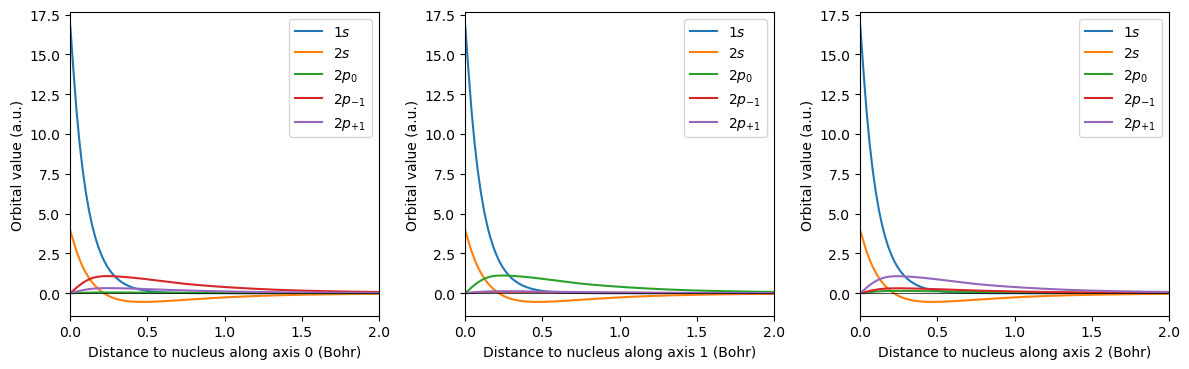

In [9]:
fig = plt.figure(figsize=(12,3.8))

mo_labels = ['$1s$', '$2s$', '$2p_0$', '$2p_{-1}$', '$2p_{+1}$']

for x in range(3):
    plt.subplot(1,3,x+1)
    for i in range(nocc):
        plt.plot(r, mos[i, x])
    plt.axhline(color='k', linewidth=0.5)
    plt.xlabel(f'Distance to nucleus along axis {x} (Bohr)')
    plt.ylabel(r'Orbital value (a.u.)')
    plt.xlim([0.0, 2.0])
    plt.legend(mo_labels)

plt.tight_layout()
plt.show()

#### 3.a Discuss the directional dependence of the orbitals


The *s* orbitals are spherically symmetric and thus do not have spherical dependence. The *p* orbitals lie along the basis vectors and their values thus depend on the direction of the radial line as is evident from the plots above, where the *p* orbital value along the directional parameter varies between the x, y, and z components.

#### 3.b Discuss nodal points and orthogonality

**Nodal points** are points where a function has the value zero. 

Each 2*p*-orbital is anti-symmetric (odd) with a node in origin and thus clearly orthogonal to both s-orbitals, which are symmetric (even). The 2*p*-orbitals are also mutually orthogonal, since they have values along one principal axis and are zero along the orthogonal principal axes of the other two *p*-orbitals. 1*s* an 2*s* are not clearly orthogonal, but since 2*s* has one node (which makes it take values <0 for large r) and 1*s* has no nodes their product will take both positive and negative values for different *r*, and these will evidently cancel out when integrating.



### 4. Radial orbital densities

In [10]:
# compute radial distribution functions for the occupied sub-shells
rad_den_1s = np.zeros((3, n))
rad_den_2s = np.zeros((3, n))
rad_den_2p = np.zeros((3, n))

for x in range(3):
    rad_den_1s[x] = 4 * np.pi * (r ** 2) * 2 * (mos[0, x] ** 2)
    rad_den_2s[x] = 4 * np.pi * (r ** 2) * 2 * (mos[1, x] ** 2)
    rad_den_2p[x] = 4 * np.pi * r ** 2 * 2 * (mos[2, x] ** 2 + mos[3, x] ** 2 + mos[4, x] ** 2)

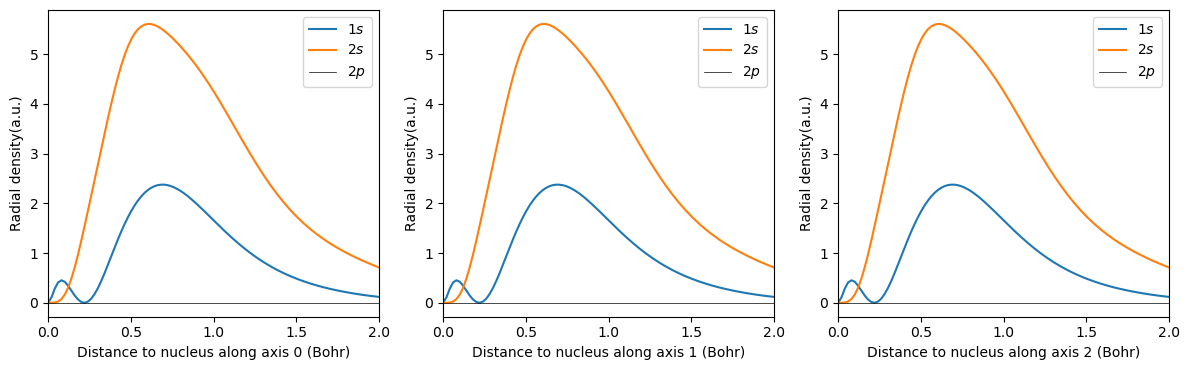

In [11]:
# plot the radial densities for the 2s and 2p sub-shells

fig = plt.figure(figsize=(12,3.8))

mo_labels = ['$1s$', '$2s$', '$2p$']

for x in range(3):
    plt.subplot(1,3,x+1)
    
    plt.plot(r, rad_den_2s[x])
    plt.plot(r, rad_den_2p[x])
    
    plt.axhline(color='k', linewidth=0.5)
    plt.xlabel(f'Distance to nucleus along axis {x} (Bohr)')
    plt.ylabel(r'Radial density(a.u.)')
    plt.xlim([0.0, 2.0])
    plt.legend(mo_labels)

plt.tight_layout()
plt.show()

#### Discuss the directional dependence of the radial densities

It is observed  that the radial densities of the 2s- and 2p subshells are indifferent to the choice of direction in terms of $x$, $y$ and $z$. This is expected, as the 2s-orbital is spherically symmetric, and the total 2p radial density is plotted which should be the same along all coordinate axes.

The radial distrbutions can be thought of as a measure of the probability of finding a particle at a distance of r away from a given reference particle. With this in mind, we see that the probability of finding an electron at the nucleus is zero, disregarding orbital type. The global maximum of both of the functions indicates the most probable distance from the nucleus to find the electron at in the respective orbitals. It is seen that this is approximately the same for both the 2s and the 2p-orbitals.

### 5. Total radial density

In [12]:
# calculate the total radial density
rad_den_tot = rad_den_1s + rad_den_2s + rad_den_2p

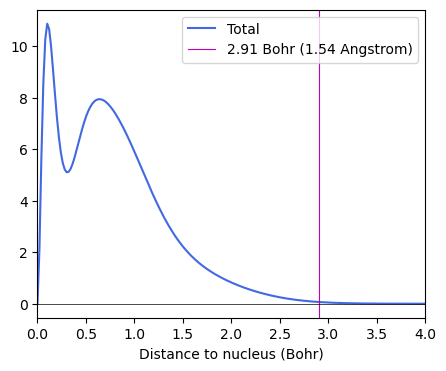

In [13]:
# plot the total radial density
# and mark the vdW radious as a vertical line in the plot

fig = plt.figure(figsize=(5,4))

plt.plot(r, rad_den_tot[2], color= 'royalblue', label = 'Total')
plt.axvline(2.91, color='m',linewidth=0.8, label = '2.91 Bohr (1.54 Angstrom)')
plt.axhline(color='k', linewidth=0.5)
plt.xlabel(r'Distance to nucleus (Bohr)')
plt.xlim(0, 4)
plt.legend( loc='upper right')

plt.show()

#### Discuss sub-shells, van der Waals radius, and atomic size

From the plot of the total radial density, we can identify the K-shell as the first peak, and the L-shell as the second, broader peak. The two maxima in the total radial distribution correspond to the most probable distance for a electron to be found at in the K- and L-shells, respectively. It is seen that the density value is close to zero at the 1.54 Angstrom mark. However, the distribution function never attains the exact value of zero for $r \to \infty$. With this in mind, the van der Waals radius seems like an appropiate measure for defining the atomic size for Ne concluded from the results obtained with our method and basis set.


### 6. Calculate the number of electrons from density integration

In [14]:
from scipy.integrate import simpson as simps

print('Number of electrons in 2s: %.4f' % simps(rad_den_2s[0], x=r))
print('Number of electrons in 2p: %.4f' % simps(rad_den_2p[0], x=r))

print('Number of electrons: %.4f' % simps(rad_den_tot[0], x=r))

Number of electrons in 2s: 2.0000
Number of electrons in 2p: 5.9999
Number of electrons: 10.0008


#### Discuss the results from the integration

Integrating the total density yields exactly the number of electrons in the system, that is 10. Integrating the subshells yields the number of electron in the respective shells (2 and 6).

### 7. Koopmans' theorem and ionization potential

In [15]:
# calculate the IP (in eV) based on Koopman's theorem
au_to_ev = 27.2114

# get the energy of the HOMO
orb_energy = scf_drv.scf_tensors['E_alpha'][4] * au_to_ev

print("IP =%6.2f eV" % -orb_energy)

IP = 22.64 eV


#### Discuss the IP in comparison to experiment and the main sources of error

**Koopman's theorem:** The first ionization energy is equal to the negative of the orbital energy of the HOMO. In this theorem we assume that the orbitals of the ion are identical to the orbitals of the neutral molecule/atom (disregarding relaxation effects).

The experimental value for the IP of Neon is 21.56 eV. Our calculated result (22.64) overestimates the IP by 1.08 eV. In the Hartree-Fock method, electron-electron repulsion is treated by averaging the interaction between every one electron and the remaining electrons. Koopman's theorem is based on the frozen orbital approximation, that is the orbitals optimized for the $N$-electron system are used for the $N-1$-electron system which, together with the level of theory, accounts for the difference in the IP compared to the experimental value.

## THE END